In [90]:
import tensorflow as tf
print(tf.__version__)
!wget --no-check-certificate \https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

2.3.0
--2020-11-06 10:16:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  11.6MB/s    in 33s     

2020-11-06 10:16:35 (9.46 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [91]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [92]:
# inisialisasi directory paper, scissors, rock
base_dir = 'rockpaperscissors'
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [93]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors', 'paper']

In [113]:
jumlah_file_rock = len(os.listdir(rock_dir))
jumlah_file_paper = len(os.listdir(paper_dir))
jumlah_file_scissors = len(os.listdir(scissors_dir))

print('Total file Rock', jumlah_file_rock)
print('Total file Paper', jumlah_file_paper)
print('Total file Scissors', jumlah_file_scissors)

Total file Rock 726
Total file Paper 712
Total file Scissors 750


In [95]:
# membuat nama directori
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktory train dan validation
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

In [96]:
from sklearn.model_selection import train_test_split
#memecah directori rock, paper, scissors menjadi 2 bagian train(80%) dan validation(20%)
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)
train_rock = os.path.join(train_dir, 'rock')
val_rock = os.path.join(validation_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
val_paper = os.path.join(validation_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_scissors = os.path.join(validation_dir, 'scissors')

In [97]:
# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)
if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [98]:
#menyalin data ke directory train dan val
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))
for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#implemen augmentasi gambar
train_conf_generator = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

validation_conf_generator = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [112]:
#membuat train generator dan validation generator
train_generator = train_conf_generator.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = validation_conf_generator.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [101]:
#membuat model sequential
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [102]:
from tensorflow.keras.optimizers import RMSprop
#spesifikasi optimizer dan loss function
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [103]:
#membuat sistem callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
          print("\nAkurasi telah mencapai > 90%!")
          self.model.stop_training = True
callbacks = myCallback()

In [104]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks=[callbacks]
)

Epoch 1/20
25/25 - 37s - loss: 1.1779 - accuracy: 0.3828 - val_loss: 1.0864 - val_accuracy: 0.4000
Epoch 2/20
25/25 - 39s - loss: 0.8755 - accuracy: 0.6109 - val_loss: 0.7256 - val_accuracy: 0.7000
Epoch 3/20
25/25 - 37s - loss: 0.6526 - accuracy: 0.7525 - val_loss: 0.4426 - val_accuracy: 0.8313
Epoch 4/20
25/25 - 37s - loss: 0.4032 - accuracy: 0.8600 - val_loss: 0.4821 - val_accuracy: 0.8375
Epoch 5/20
25/25 - 37s - loss: 0.3379 - accuracy: 0.8783 - val_loss: 0.2762 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 37s - loss: 0.2240 - accuracy: 0.9252 - val_loss: 0.2533 - val_accuracy: 0.9000
Epoch 7/20

Akurasi telah mencapai > 90%!
25/25 - 37s - loss: 0.2451 - accuracy: 0.9200 - val_loss: 0.1540 - val_accuracy: 0.9375


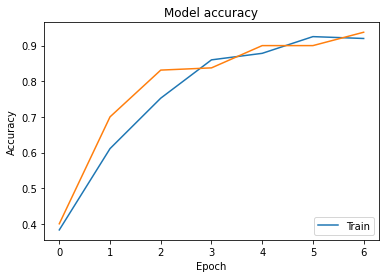

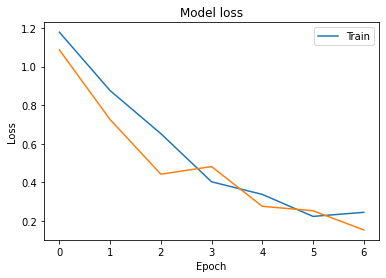

In [105]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Loss')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [106]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpzmg2d9s9/assets


INFO:tensorflow:Assets written to: /tmp/tmpzmg2d9s9/assets


In [107]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)